# Capítulo 1 - Introdução

**Vocabulário:**

- **Conjunto de treino:** Conjunto de dados utilizado para treinar o modelo. O objetivo é ajustar os parâmetros do modelo para que ele se ajuste bem aos dados de treino.

- **Conjunto de Teste:** Conjunto de dados separado do conjunto de treino, usado para avaliar a performance do modelo em dados que ele não viu durante o treino.

- **Target vector \( t \):** Vetor de valores reais ou esperados para as amostras do conjunto de dados, que o modelo tenta prever ou aproximar.

- **Fase de treino/aprendizado:** Processo em que o modelo é treinado usando o conjunto de treino, ajustando seus parâmetros para minimizar o erro na predição.

- **Generalização:** Capacidade do modelo de performar bem em dados novos e não vistos, que não foram usados durante o treinamento.

- **Pré-processamento dos dados:** Etapas realizadas para preparar os dados antes de usá-los para treinamento, como normalização, limpeza e transformação dos dados.

- **Extração de Features:** Processo de selecionar características (features) relevantes dos dados que o modelo deverá se atentar para "aprender".

- **Supervisionado:** Métodos onde o modelo é treinado usando dados rotulados. Exemplos incluem regressão (previsão de valores contínuos) e classificação (categorizar dados em classes).

- **Não supervisionado:** Métodos onde o modelo trabalha com dados não rotulados. Exemplos incluem clusterização (agrupamento de dados em clusters), estimação de densidade (modelagem da distribuição dos dados) e projeção de dados de alta dimensão para 2D ou 3D (redução de dimensionalidade).

- **Reinforcement Learning (Aprendizado por Reforço):** Tipo de aprendizado onde um agente aprende a tomar decisões otimizadas através de interações com um ambiente, recebendo recompensas ou penalidades.

## 1.1 - Exemplo: Regressão Polinômial

O objetivo é ajustar uma curva polinomial aos nossos dados. 
Segue a forma de tal função:

$
y(x, \mathbf{w}) = w_0 + w_1 x + w_2 x^2 + \cdots + w_M x^M
$

<a id="funcao-1.1"></a>
Reformulando usando notação de somatório temos:

$
y(x, \mathbf{w}) = \sum_{j=0}^{M} w_j x^j
$ 
  (1.1)


Os coeficientes $\mathbf{w}$ da função polinomial em [1.1](#funcao-1.1) serão determinados através de um processo que ajusta o polinômio a um conjunto de dados de treino. O critério de qualidade do ajuste é uma *função de erro* que mede o quão bem o polinômio se ajusta aos dados. O objetivo é minimizar o erro residual usando a seguinte função:
<a id="funcao-1.2"></a>
$$
E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^{N} (y(x_n, \mathbf{w}) - t_n)^2
$$ (1.2)

Onde:
- $y(x_n, \mathbf{w})$ é a predição do modelo para o ponto $x_n$.
- $t_n$ é o valor observado correspondente ao ponto $x_n$.
- $N$ é o número total de pontos de dados.

Dividir o somatório por 2 é uma convenção comum que simplifica a derivada da função de erro, especialmente no contexto de métodos de otimização como o [gradiente descendente](https://pt.wikipedia.org/wiki/M%C3%A9todo_do_gradiente).

No livro, é utilizado um conjunto de dados gerados artificialmente pela função $\sin(2\pi x)$. A cada ponto da função é adicionado um ruído aleatório proveniente de uma distribuição gaussiana, e esses pontos serão nossos valores observados $t_n$. O objetivo é simular observações reais que são corrompidas por ruídos aleatórios, os quais surgem naturalmente de fontes desconhecidas, seja devido à imprecisão das medições ou a outros fatores não identificados.

A seguir, temos uma reprodução da Figura 1.2 do livro:
<a id="figura-1.2"></a>

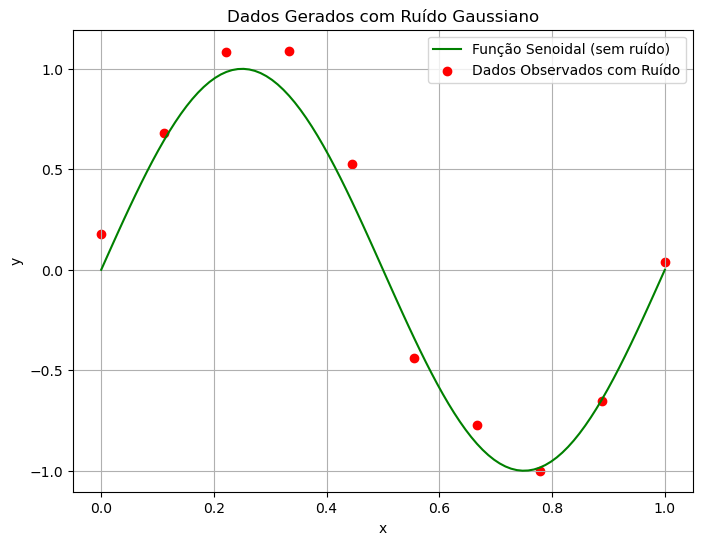

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Configurações
np.random.seed(0)  # Para reprodutibilidade
num_pontos = 10
x = np.linspace(0, 1, num_pontos)  # 10 pontos no intervalo [0, 1]
x_suave = np.linspace(0, 1, 100)  # Para a curva suave
ruido_std = 0.1  # Desvio padrão do ruído gaussiano

# Gera os valores da função seno
y_true = np.sin(2 * np.pi * x)
y_true_suave = np.sin(2 * np.pi * x_suave)

# Adiciona ruído gaussiano
ruido = np.random.normal(0, ruido_std, num_pontos)
y_observado = y_true + ruido

# Plota os resultados
plt.figure(figsize=(8, 6))
plt.plot(x_suave, y_true_suave, label='Função Senoidal (sem ruído)', color='green')
plt.scatter(x, y_observado, color='red', label='Dados Observados com Ruído')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados Gerados com Ruído Gaussiano')
plt.legend()
plt.grid(True)
plt.show()

O processo natural subjacente que gera os dados observados é representado pela função senoidal mostrada em verde. Durante o processo de modelagem, não sabemos exatamente qual é essa função.

Se assumirmos que o processo pode ser modelado por um polinômio (como pretendemos neste exemplo), nosso trabalho consiste em ajustar os coeficientes **w** de maneira que a função de erro $E(\mathbf{w})$ seja minimizada. 

Embora a função de erro seja quadrática, a derivada desta função em relação a esses coeficientes é linear. Isso implica que a minimização de $E(\mathbf{w})$ possui uma solução única.

O código a seguir cria um gráfico inspirado na Figura 1.3 do livro.

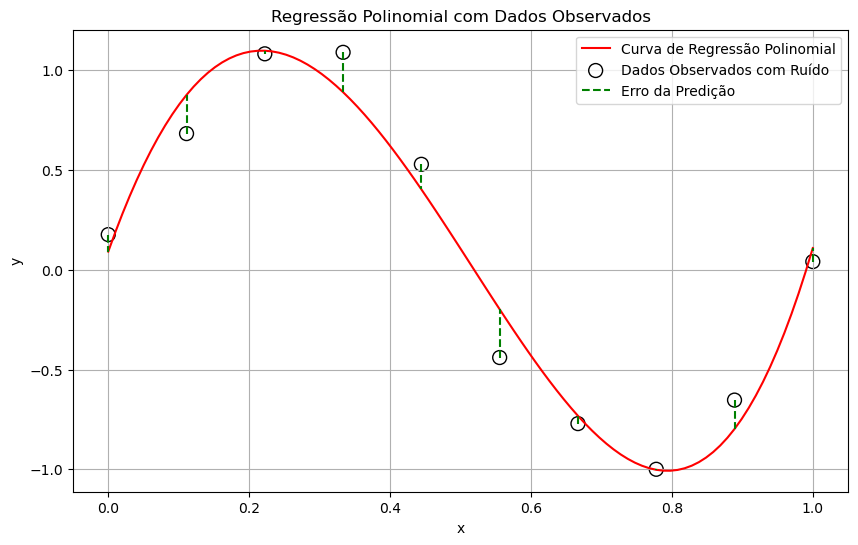

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Configurações
np.random.seed(0)  # Para reprodutibilidade
num_pontos = 10
x = np.linspace(0, 1, num_pontos).reshape(-1, 1)  # Dados de entrada, reshape para compatibilidade
x_suave = np.linspace(0, 1, 100).reshape(-1, 1)  # Para a curva suave
ruido_std = 0.1  # Desvio padrão do ruído gaussiano

# Gera os valores da função seno
y_true = np.sin(2 * np.pi * x)

# Adiciona ruído gaussiano
ruido = np.random.normal(0, ruido_std, num_pontos).reshape(-1, 1)
y_observado = y_true + ruido

# Ajusta um modelo de regressão polinomial
grau_polinomio = 4  # Grau do polinômio
poly_features = PolynomialFeatures(degree=grau_polinomio)
X_poly = poly_features.fit_transform(x)
model = LinearRegression()
model.fit(X_poly, y_observado)
y_pred = model.predict(poly_features.transform(x_suave))

# Plota os resultados
plt.figure(figsize=(10, 6))
plt.plot(x_suave, y_pred, color='red', label='Curva de Regressão Polinomial')
plt.scatter(x, y_observado, color='black', edgecolor='black', marker='o', s=100, facecolor='none', label='Dados Observados com Ruído')
for i in range(num_pontos):
    plt.plot([x[i], x[i]], [y_observado[i], model.predict(poly_features.transform(x[i].reshape(1, -1)))[0]], color='green', linestyle='--', label='Erro da Predição' if i == 0 else "")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Polinomial com Dados Observados')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

O que precisamos definir é o grau do polinômio em [1.1](#funcao-1.1). Para isso, devemos experimentar diferentes graus para o polinômio e comparar os resultados obtidos. O objetivo é escolher o grau que melhor generaliza o conhecimento adquirido a partir dos dados de treino para novos dados de teste.

O código a seguir, tenta reproduzir a Figura 1.4 do livro. <a id="figura-1.4"></a>

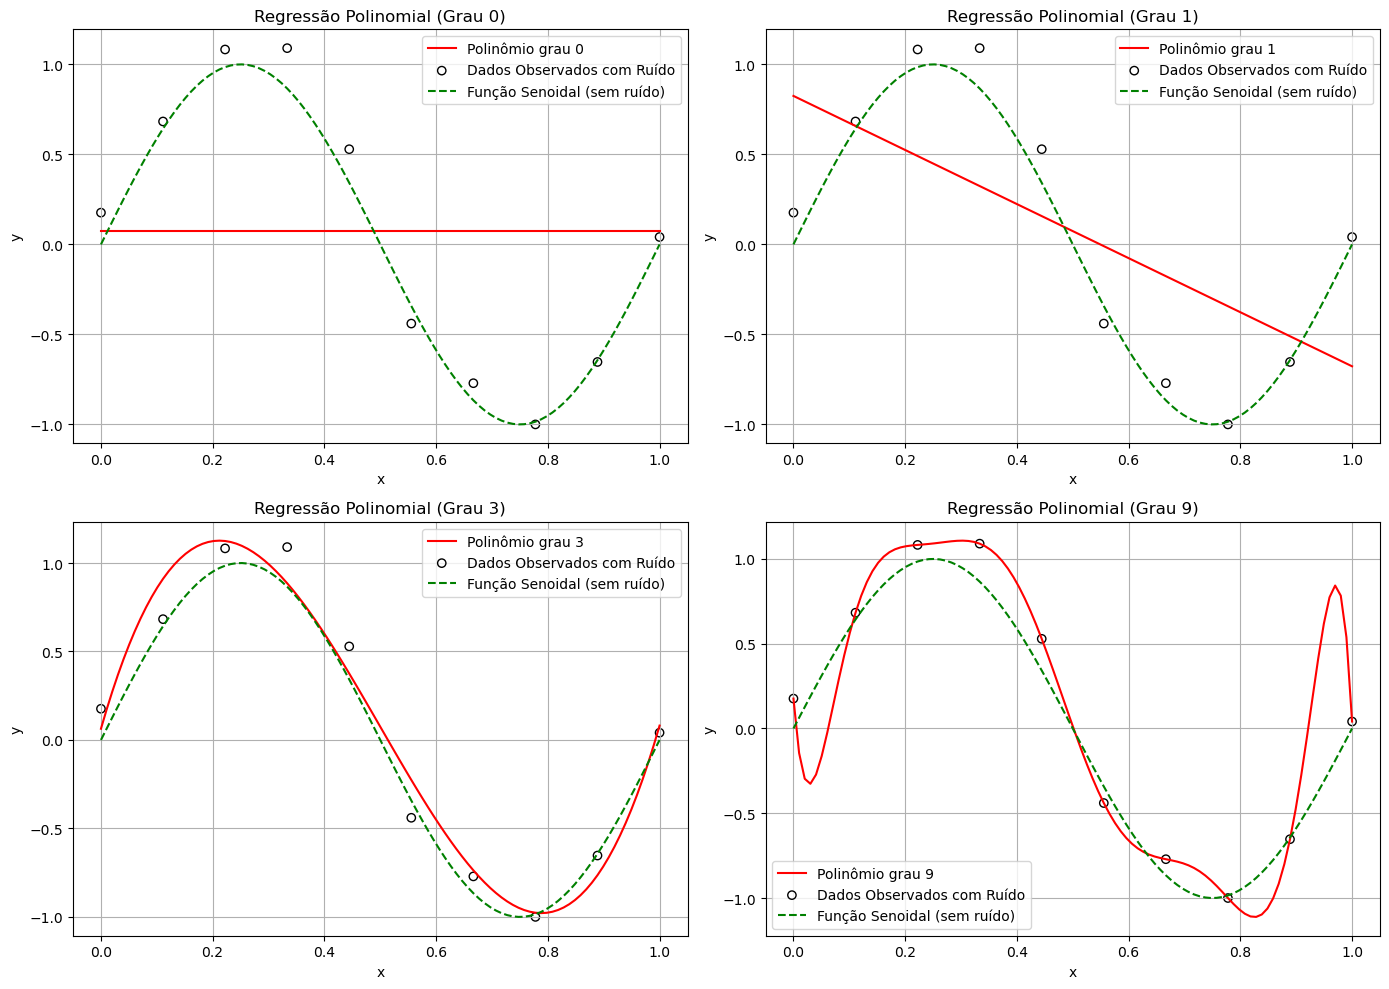

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Configurações
np.random.seed(0)  # Para reprodutibilidade
num_pontos = 10
x = np.linspace(0, 1, num_pontos).reshape(-1, 1)  # Dados de entrada, reshape para compatibilidade
x_suave = np.linspace(0, 1, 100).reshape(-1, 1)  # Para a curva suave
graus_polinomio = [0, 1, 3, 9]  # Graus dos polinômios
ruido_std = 0.1  # Desvio padrão do ruído gaussiano

# Gera os valores da função seno sem ruído
y_true = np.sin(2 * np.pi * x)
y_true_suave = np.sin(2 * np.pi * x_suave)

# Adiciona ruído gaussiano aos dados
ruido = np.random.normal(0, ruido_std, num_pontos).reshape(-1, 1)
y_observado = y_true + ruido

# Inicializa a figura com uma grade 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, grau in enumerate(graus_polinomio):
    # Ajusta um modelo de regressão polinomial
    poly_features = PolynomialFeatures(degree=grau)
    X_poly = poly_features.fit_transform(x)
    model = LinearRegression()
    model.fit(X_poly, y_observado)
    y_pred = model.predict(poly_features.transform(x_suave))

    # Plota os resultados
    axs[i].plot(x_suave, y_pred, color='red', label=f'Polinômio grau {grau}')
    axs[i].scatter(x, y_observado, color='black', edgecolor='black', marker='o', facecolor='none', label='Dados Observados com Ruído')
    axs[i].plot(x_suave, y_true_suave, color='green', linestyle='--', label='Função Senoidal (sem ruído)')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].set_title(f'Regressão Polinomial (Grau {grau})')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

Qual destes gráficos melhor generaliza o processo "misterioso" (em verde) que gerou nossas observações (que incluem ruído)?

Observando os gráficos para $ M = 0 $ e $M = 1$, podemos ver que o erro é bastante elevado. Por outro lado, para $ M = 9 $, o erro parece ser zero, mas isso não indica necessariamente um bom resultado, pois um polinômio de grau 9 pode estar se ajustando ao ruído aleatório presente nas observações, em vez de capturar o padrão real.

O gráfico com $ M = 3 $ apresenta um ajuste que está mais próximo do processo "misterioso" que gerou as observações, sugerindo que pode generalizar melhor do que os modelos com $ M = 0 $, $ M = 1 $ ou $ M = 9 $.

Como podemos medir a capacidade de generalização dos diferentes modelos? A resposta está no uso do nosso conjunto de teste.